In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from utils import evaluate_scores

pd.options.display.max_columns = None

# Data Load

In [2]:
df = pd.read_parquet("../data/cleaned/insomnia_healthy_patients.parquet")

df.head()

,PATIENT ID,DATE MONTH,DATE DAY,DATE WEEK DAY,SLEEP START,SLEEP START LAST DAY 1,SLEEP START LAST DAY 2,SLEEP START LAST DAY 3,SLEEP START LAST DAY 4,SLEEP START LAST DAY 5,SLEEP START LAST DAY 6,SLEEP END,SLEEP END LAST DAY 1,SLEEP END LAST DAY 2,SLEEP END LAST DAY 3,SLEEP END LAST DAY 4,SLEEP END LAST DAY 5,SLEEP END LAST DAY 6,HOURS OF SLEEP,HOURS OF SLEEP LAST DAY 1,HOURS OF SLEEP LAST DAY 2,HOURS OF SLEEP LAST DAY 3,HOURS OF SLEEP LAST DAY 4,HOURS OF SLEEP LAST DAY 5,HOURS OF SLEEP LAST DAY 6,REM SLEEP,REM SLEEP LAST DAY 1,REM SLEEP LAST DAY 2,REM SLEEP LAST DAY 3,REM SLEEP LAST DAY 4,REM SLEEP LAST DAY 5,REM SLEEP LAST DAY 6,DEEP SLEEP,DEEP SLEEP LAST DAY 1,DEEP SLEEP LAST DAY 2,DEEP SLEEP LAST DAY 3,DEEP SLEEP LAST DAY 4,DEEP SLEEP LAST DAY 5,DEEP SLEEP LAST DAY 6,HEART RATE BELOW RESTING,HEART RATE BELOW RESTING LAST DAY 1,HEART RATE BELOW RESTING LAST DAY 2,HEART RATE BELOW RESTING LAST DAY 3,HEART RATE BELOW RESTING LAST DAY 4,HEART RATE BELOW RESTING LAST DAY 5,HEART RATE BELOW RESTING LAST DAY 6,BAD NIGHT,BAD NIGHT LAST DAY 1,BAD NIGHT LAST DAY 2,BAD NIGHT LAST DAY 3,BAD NIGHT LAST DAY 4,BAD NIGHT LAST DAY 5,BAD NIGHT LAST DAY 6,FREQUENCY OF BAD NIGHTS,FREQUENCY OF GOOD NIGHTS,INSOMNIA
70,b5581b1a132020fd07f64854c8fbe3df,1,7,4,22.166667,23.983333,22.700000,22.866667,23.450000,2.850000,6.166667,5.966667,7.883333,6.950000,7.316667,8.466667,11.983333,10.866667,6.800000,6.766667,7.166667,7.416667,7.450000,8.150000,4.216667,0.19,0.14,0.18,0.19,0.16,0.22,0.15,0.21,0.16,0.15,0.21,0.13,0.18,0.18,0.96,0.96,0.89,0.99,0.96,0.92,0.00,0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,1
71,1989843011c12217ba5ef04914877212,1,8,5,23.066667,22.166667,23.983333,22.700000,22.866667,23.450000,2.850000,8.083333,5.966667,7.883333,6.950000,7.316667,8.466667,11.983333,7.616667,6.800000,6.766667,7.166667,7.416667,7.450000,8.150000,0.12,0.19,0.14,0.18,0.19,0.16,0.22,0.17,0.21,0.16,0.15,0.21,0.13,0.18,0.98,0.96,0.96,0.89,0.99,0.96,0.92,0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,5.0,1
72,83b7e7305157d7b4a3be1885d0f8bdb3,1,9,6,23.216667,23.066667,22.166667,23.983333,22.700000,22.866667,23.450000,8.100000,8.083333,5.966667,7.883333,6.950000,7.316667,8.466667,7.783333,7.616667,6.800000,6.766667,7.166667,7.416667,7.450000,0.20,0.12,0.19,0.14,0.18,0.19,0.16,0.12,0.17,0.21,0.16,0.15,0.21,0.13,0.98,0.98,0.96,0.96,0.89,0.99,0.96,0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,5.0,1
73,1ae209b6f15b012c97fbb6e4af42d4e2,1,10,0,22.616667,23.216667,23.066667,22.166667,23.983333,22.700000,22.866667,7.150000,8.100000,8.083333,5.966667,7.883333,6.950000,7.316667,7.433333,7.783333,7.616667,6.800000,6.766667,7.166667,7.416667,0.23,0.20,0.12,0.19,0.14,0.18,0.19,0.18,0.12,0.17,0.21,0.16,0.15,0.21,0.96,0.98,0.98,0.96,0.96,0.89,0.99,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,0
74,ea2ab5f4a4e6873b4227a2ca3f942b25,1,11,1,23.483333,22.616667,23.216667,23.066667,22.166667,23.983333,22.700000,7.216667,7.150000,8.100000,8.083333,5.966667,7.883333,6.950000,6.983333,7.433333,7.783333,7.616667,6.800000,6.766667,7.166667,0.31,0.23,0.20,0.12,0.19,0.14,0.18,0.24,0.18,0.12,0.17,0.21,0.16,0.15,0.71,0.96,0.98,0.98,0.96,0.96,0.89,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,0


# Simple Feature Selection

In [3]:
target_col = 'INSOMNIA'

feature_cols = [
    "SLEEP START",
    "SLEEP START LAST DAY 1",
    "SLEEP START LAST DAY 2",
    "SLEEP START LAST DAY 3",
    "SLEEP START LAST DAY 4",
    "SLEEP START LAST DAY 5",
    "SLEEP START LAST DAY 6",

    "SLEEP END",
    "SLEEP END LAST DAY 1",
    "SLEEP END LAST DAY 2",
    "SLEEP END LAST DAY 3",
    "SLEEP END LAST DAY 4",
    "SLEEP END LAST DAY 5",
    "SLEEP END LAST DAY 6",

    "HOURS OF SLEEP",
    "HOURS OF SLEEP LAST DAY 1",
    "HOURS OF SLEEP LAST DAY 2",
    "HOURS OF SLEEP LAST DAY 3",
    "HOURS OF SLEEP LAST DAY 4",
    "HOURS OF SLEEP LAST DAY 5",
    "HOURS OF SLEEP LAST DAY 6",

    "REM SLEEP",
    "REM SLEEP LAST DAY 1",
    "REM SLEEP LAST DAY 2",
    "REM SLEEP LAST DAY 3",
    "REM SLEEP LAST DAY 4",
    "REM SLEEP LAST DAY 5",
    "REM SLEEP LAST DAY 6",

    "DEEP SLEEP",
    "DEEP SLEEP LAST DAY 1",
    "DEEP SLEEP LAST DAY 2",
    "DEEP SLEEP LAST DAY 3",
    "DEEP SLEEP LAST DAY 4",
    "DEEP SLEEP LAST DAY 5",
    "DEEP SLEEP LAST DAY 6",

    "HEART RATE BELOW RESTING",
    "HEART RATE BELOW RESTING LAST DAY 1",
    "HEART RATE BELOW RESTING LAST DAY 2",
    "HEART RATE BELOW RESTING LAST DAY 3",
    "HEART RATE BELOW RESTING LAST DAY 4",
    "HEART RATE BELOW RESTING LAST DAY 5",
    "HEART RATE BELOW RESTING LAST DAY 6",

    # 'BAD NIGHT',
    # 'BAD NIGHT LAST DAY 1',
    # 'BAD NIGHT LAST DAY 2',
    # 'BAD NIGHT LAST DAY 3',
    # 'BAD NIGHT LAST DAY 4',
    # 'BAD NIGHT LAST DAY 5',
    # 'BAD NIGHT LAST DAY 6',

    # "FREQUENCY OF BAD NIGHTS",
    # "FREQUENCY OF GOOD NIGHTS",
]

df = df[feature_cols + [target_col]] 

df.head()

,SLEEP START,SLEEP START LAST DAY 1,SLEEP START LAST DAY 2,SLEEP START LAST DAY 3,SLEEP START LAST DAY 4,SLEEP START LAST DAY 5,SLEEP START LAST DAY 6,SLEEP END,SLEEP END LAST DAY 1,SLEEP END LAST DAY 2,SLEEP END LAST DAY 3,SLEEP END LAST DAY 4,SLEEP END LAST DAY 5,SLEEP END LAST DAY 6,HOURS OF SLEEP,HOURS OF SLEEP LAST DAY 1,HOURS OF SLEEP LAST DAY 2,HOURS OF SLEEP LAST DAY 3,HOURS OF SLEEP LAST DAY 4,HOURS OF SLEEP LAST DAY 5,HOURS OF SLEEP LAST DAY 6,REM SLEEP,REM SLEEP LAST DAY 1,REM SLEEP LAST DAY 2,REM SLEEP LAST DAY 3,REM SLEEP LAST DAY 4,REM SLEEP LAST DAY 5,REM SLEEP LAST DAY 6,DEEP SLEEP,DEEP SLEEP LAST DAY 1,DEEP SLEEP LAST DAY 2,DEEP SLEEP LAST DAY 3,DEEP SLEEP LAST DAY 4,DEEP SLEEP LAST DAY 5,DEEP SLEEP LAST DAY 6,HEART RATE BELOW RESTING,HEART RATE BELOW RESTING LAST DAY 1,HEART RATE BELOW RESTING LAST DAY 2,HEART RATE BELOW RESTING LAST DAY 3,HEART RATE BELOW RESTING LAST DAY 4,HEART RATE BELOW RESTING LAST DAY 5,HEART RATE BELOW RESTING LAST DAY 6,INSOMNIA
70,22.166667,23.983333,22.700000,22.866667,23.450000,2.850000,6.166667,5.966667,7.883333,6.950000,7.316667,8.466667,11.983333,10.866667,6.800000,6.766667,7.166667,7.416667,7.450000,8.150000,4.216667,0.19,0.14,0.18,0.19,0.16,0.22,0.15,0.21,0.16,0.15,0.21,0.13,0.18,0.18,0.96,0.96,0.89,0.99,0.96,0.92,0.00,1
71,23.066667,22.166667,23.983333,22.700000,22.866667,23.450000,2.850000,8.083333,5.966667,7.883333,6.950000,7.316667,8.466667,11.983333,7.616667,6.800000,6.766667,7.166667,7.416667,7.450000,8.150000,0.12,0.19,0.14,0.18,0.19,0.16,0.22,0.17,0.21,0.16,0.15,0.21,0.13,0.18,0.98,0.96,0.96,0.89,0.99,0.96,0.92,1
72,23.216667,23.066667,22.166667,23.983333,22.700000,22.866667,23.450000,8.100000,8.083333,5.966667,7.883333,6.950000,7.316667,8.466667,7.783333,7.616667,6.800000,6.766667,7.166667,7.416667,7.450000,0.20,0.12,0.19,0.14,0.18,0.19,0.16,0.12,0.17,0.21,0.16,0.15,0.21,0.13,0.98,0.98,0.96,0.96,0.89,0.99,0.96,1
73,22.616667,23.216667,23.066667,22.166667,23.983333,22.700000,22.866667,7.150000,8.100000,8.083333,5.966667,7.883333,6.950000,7.316667,7.433333,7.783333,7.616667,6.800000,6.766667,7.166667,7.416667,0.23,0.20,0.12,0.19,0.14,0.18,0.19,0.18,0.12,0.17,0.21,0.16,0.15,0.21,0.96,0.98,0.98,0.96,0.96,0.89,0.99,0
74,23.483333,22.616667,23.216667,23.066667,22.166667,23.983333,22.700000,7.216667,7.150000,8.100000,8.083333,5.966667,7.883333,6.950000,6.983333,7.433333,7.783333,7.616667,6.800000,6.766667,7.166667,0.31,0.23,0.20,0.12,0.19,0.14,0.18,0.24,0.18,0.12,0.17,0.21,0.16,0.15,0.71,0.96,0.98,0.98,0.96,0.96,0.89,0


# Train and Test Split

In [4]:
X = df[feature_cols]
y = df[target_col].astype(bool)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and Test Classification Models

In [5]:
method_names = []
method_accuracy_scores = []
method_sensitivity_scores = []
method_specificity_scores = []

In [6]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

model.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=False,
)

y_hat = model.predict(X_test)
accuracy_result, sensitivity_result, specificity_result = evaluate_scores(y_test, y_hat)

method_names.append("Catboost")
method_accuracy_scores.append(accuracy_result)
method_sensitivity_scores.append(sensitivity_result)
method_specificity_scores.append(specificity_result)

Classification Scores: accuracy=0.6538461538461539 sensitivity=0.23809523809523808 specificity=0.9354838709677419


In [7]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_test, y_test)
y_hat = model.predict(X_test)
accuracy_result, sensitivity_result, specificity_result = evaluate_scores(y_test, y_hat)

method_names.append("Naive Bayes")
method_accuracy_scores.append(accuracy_result)
method_sensitivity_scores.append(sensitivity_result)
method_specificity_scores.append(specificity_result)

Classification Scores: accuracy=0.6538461538461539 sensitivity=0.23809523809523808 specificity=0.9354838709677419


In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_hat = model.predict(X_test)
accuracy_result, sensitivity_result, specificity_result = evaluate_scores(y_test, y_hat)

method_names.append("Logistic Regression")
method_accuracy_scores.append(accuracy_result)
method_sensitivity_scores.append(sensitivity_result)
method_specificity_scores.append(specificity_result)

Classification Scores: accuracy=0.6538461538461539 sensitivity=0.23809523809523808 specificity=0.9354838709677419


c:\Users\fernandofelix\Workspace\sono\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train, y_train)

y_hat = model.predict(X_test)
accuracy_result, sensitivity_result, specificity_result = evaluate_scores(y_test, y_hat)

method_names.append("Random Forest")
method_accuracy_scores.append(accuracy_result)
method_sensitivity_scores.append(sensitivity_result)
method_specificity_scores.append(specificity_result)

Classification Scores: accuracy=0.6538461538461539 sensitivity=0.23809523809523808 specificity=0.9354838709677419


In [10]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

y_hat = model.predict(X_test)
accuracy_result, sensitivity_result, specificity_result = evaluate_scores(y_test, y_hat)

method_names.append("SVM")
method_accuracy_scores.append(accuracy_result)
method_sensitivity_scores.append(sensitivity_result)
method_specificity_scores.append(specificity_result)

Classification Scores: accuracy=0.6538461538461539 sensitivity=0.23809523809523808 specificity=0.9354838709677419


# Compare model results

Text(0, 0.5, 'Method Score')

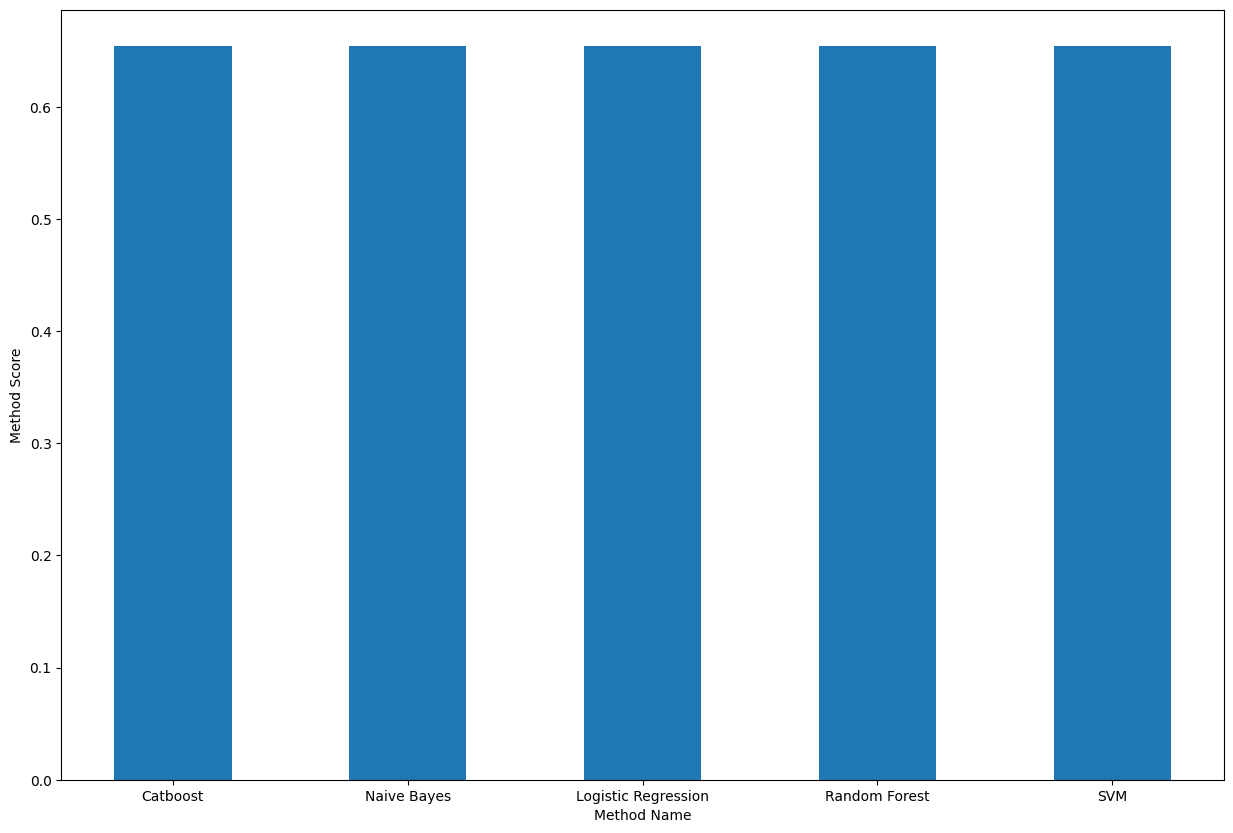

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.bar(method_names, method_accuracy_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

Text(0, 0.5, 'Method Score')

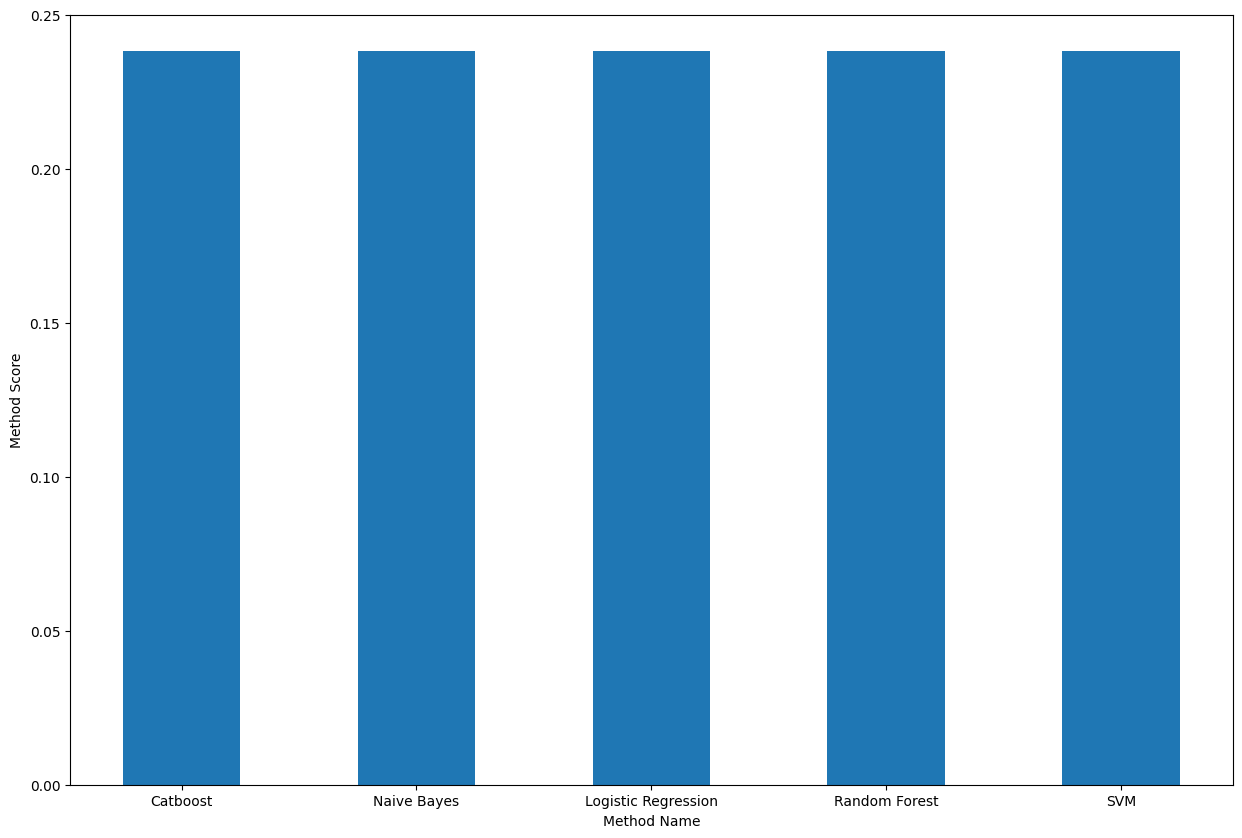

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.bar(method_names, method_sensitivity_scores, width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

Text(0, 0.5, 'Method Score')

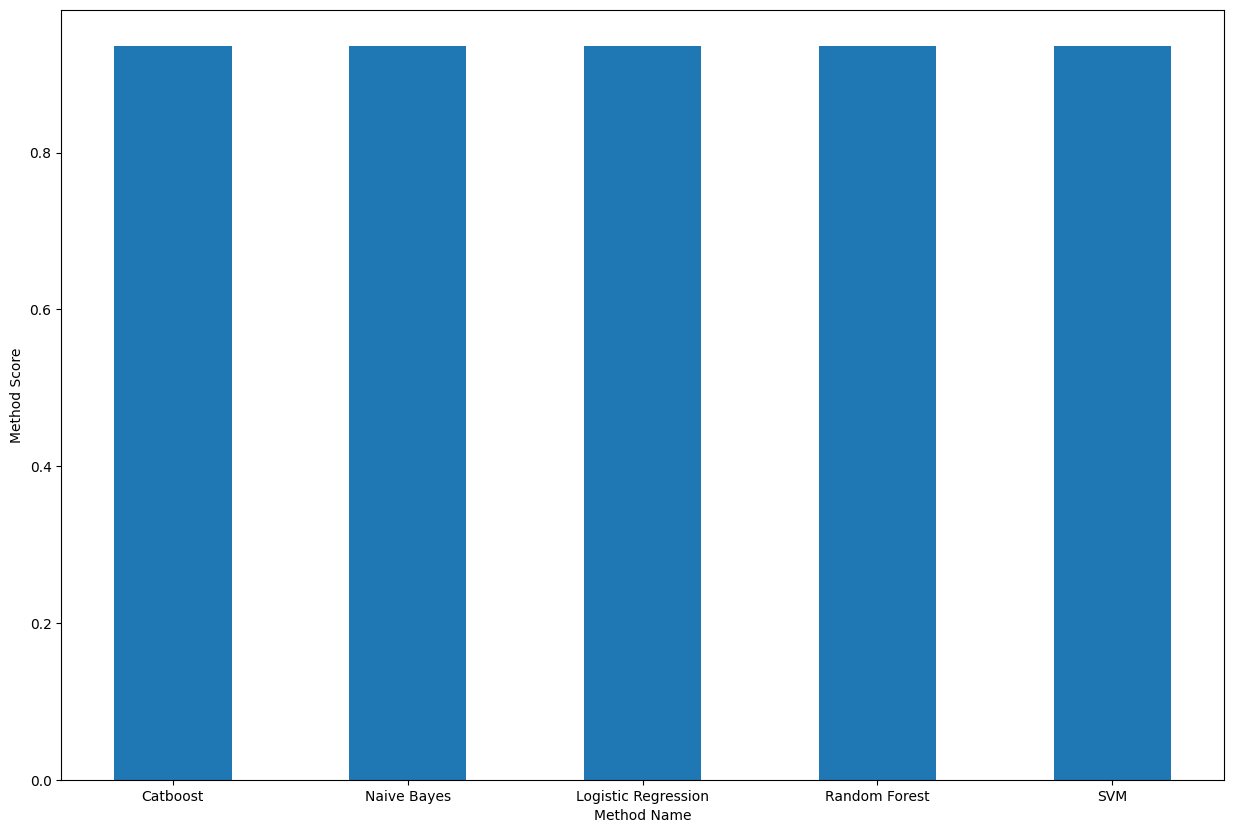

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.bar(method_names, method_specificity_scores, width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')